# Ablation 2.1: Exploration vs. Exploitation Analysis

In [10]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from pathlib import Path
import numpy as np

sns.set_theme(style="whitegrid")

fig_dir = Path('figures')
fig_dir.mkdir(exist_ok=True)

plt.rcParams.update({
    "font.size": 36,  # Increased base font size
    "axes.titlesize": 36,  # Larger title
    "axes.labelsize": 36,  # Larger axis labels
    "legend.fontsize": 36,  # Larger legend
    "xtick.labelsize": 32,  # Larger x-tick labels
    "ytick.labelsize": 32,  # Larger y-tick labels
    "figure.titlesize": 40,  # Larger figure title
})

# Use professional serif font
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'DejaVu Serif', 'serif']
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'normal'  # Changed from 'bold' to 'normal'

# High DPI for crisp text and lines
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.2

# Professional line and marker settings
plt.rcParams['lines.linewidth'] = 3.5
plt.rcParams['lines.markersize'] = 12
plt.rcParams['axes.linewidth'] = 2

In [11]:
# Define scenarios and find benchmark directories
scenarios = {
    "Exploitation Only": "exploitation_only",
    "Exploration Only": "exploration_only",
    "Balanced": "balanced"
}

# Find all benchmark result directories
benchmark_dirs = glob.glob("*_results/")
benchmarks = set()
for dir_path in benchmark_dirs:
    benchmark_name = dir_path.rstrip('/').replace('_results', '')
    benchmarks.add(benchmark_name)

print(f"Found benchmark directories: {sorted(benchmarks)}")

# Load results for each benchmark
benchmark_dataframes = {}
all_results_by_benchmark = {}

for benchmark in sorted(benchmarks):
    print(f"\nProcessing benchmark: {benchmark}")
    benchmark_dir = f"{benchmark}_results"

    all_results = []
    for scenario_display_name, scenario_file_prefix in scenarios.items():
        file_pattern = f"{benchmark_dir}/{scenario_file_prefix}_run_*_results.json"
        run_files = glob.glob(file_pattern)
        if not run_files:
            print(f"Warning: Could not find result files for '{scenario_display_name}' in '{benchmark}' with pattern {file_pattern}")
            continue

        for run_file in run_files:
            with open(run_file, 'r') as f:
                data = json.load(f)
                all_results.append(data)

    all_results_by_benchmark[benchmark] = all_results

    # Extract iteration-level data into a DataFrame for this benchmark
    all_iterations_data = []
    initial_data = []

    for data in all_results:
        scenario_name = data['scenario_name']
        run_number = data['run_number']
        display_name = [k for k, v in scenarios.items() if v == scenario_name]
        if not display_name:
            continue
        display_name = display_name[0]

        # Add initial state (iteration 0)
        if data['iterations']:
            initial_data.append({
                "benchmark": benchmark,
                "scenario": display_name,
                "run": run_number,
                "iteration": 0,
                "worst_group_accuracy": data['iterations'][0]['worst_group_before_aug'].get('accuracy', 0.0),
                "overall_accuracy": data['initial_accuracy']
            })

        # Add subsequent iterations
        for iteration_data in data['iterations']:
            all_iterations_data.append({
                "benchmark": benchmark,
                "scenario": display_name,
                "run": run_number,
                "iteration": iteration_data['iteration'],
                "worst_group_accuracy": iteration_data['worst_group_after_aug'].get('accuracy', 0.0),
                "overall_accuracy": iteration_data['overall_accuracy']
            })

    if all_iterations_data or initial_data:
        df_initial = pd.DataFrame(initial_data)
        df_iterations = pd.DataFrame(all_iterations_data)
        benchmark_df = pd.concat([df_initial, df_iterations], ignore_index=True)
        benchmark_dataframes[benchmark] = benchmark_df

        print(f"Successfully loaded {len(benchmark_df)} records for benchmark '{benchmark}'")
    else:
        print(f"No data loaded for benchmark '{benchmark}'. Please run the experiment first.")
        benchmark_dataframes[benchmark] = pd.DataFrame()

# Combine all benchmark dataframes
if benchmark_dataframes:
    df = pd.concat(benchmark_dataframes.values(), ignore_index=True)
    print(f"\nCombined dataframe shape: {df.shape}")
    print("Sample of combined data:")
    display(df.head())
else:
    print("No data loaded from any benchmark.")
    df = pd.DataFrame()

Found benchmark directories: ['adience', 'animals', 'ffhq', 'fruits']

Processing benchmark: adience
Successfully loaded 99 records for benchmark 'adience'

Processing benchmark: animals
Successfully loaded 99 records for benchmark 'animals'

Processing benchmark: ffhq
Successfully loaded 99 records for benchmark 'ffhq'

Processing benchmark: fruits
Successfully loaded 99 records for benchmark 'fruits'

Combined dataframe shape: (396, 6)
Sample of combined data:


,benchmark,scenario,run,iteration,worst_group_accuracy,overall_accuracy
0,adience,Exploitation Only,2,0,0.655914,0.725
1,adience,Exploitation Only,3,0,0.655914,0.725
2,adience,Exploitation Only,1,0,0.655914,0.725
3,adience,Exploration Only,1,0,0.655914,0.725
4,adience,Exploration Only,3,0,0.655914,0.725


## Worst-Group Accuracy Over Iterations

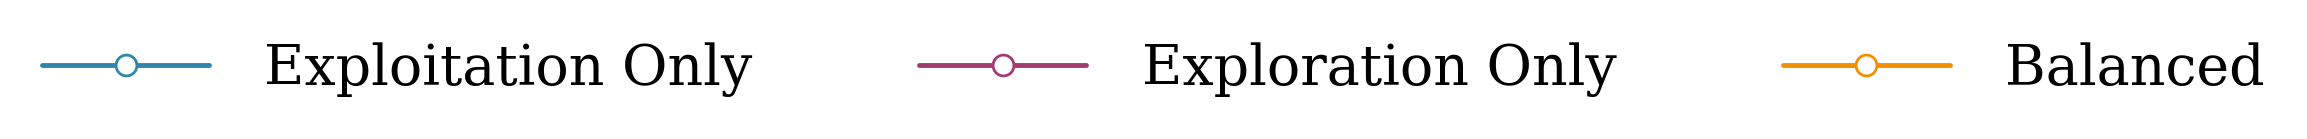

Generating figures for benchmark: adience


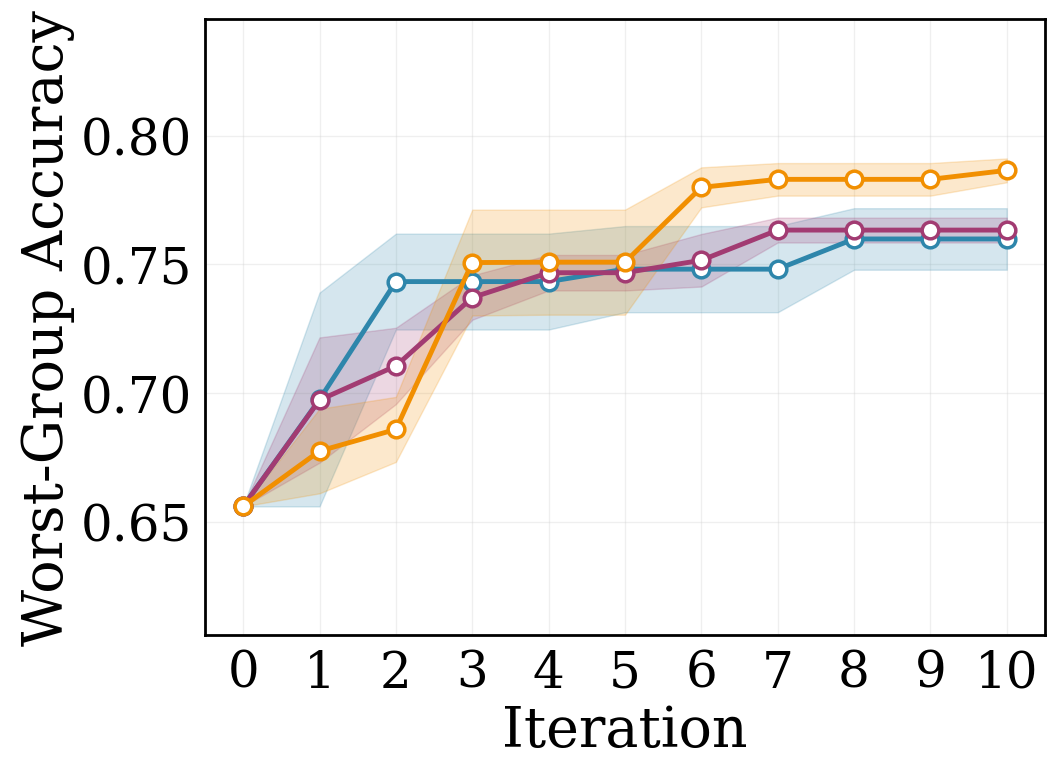

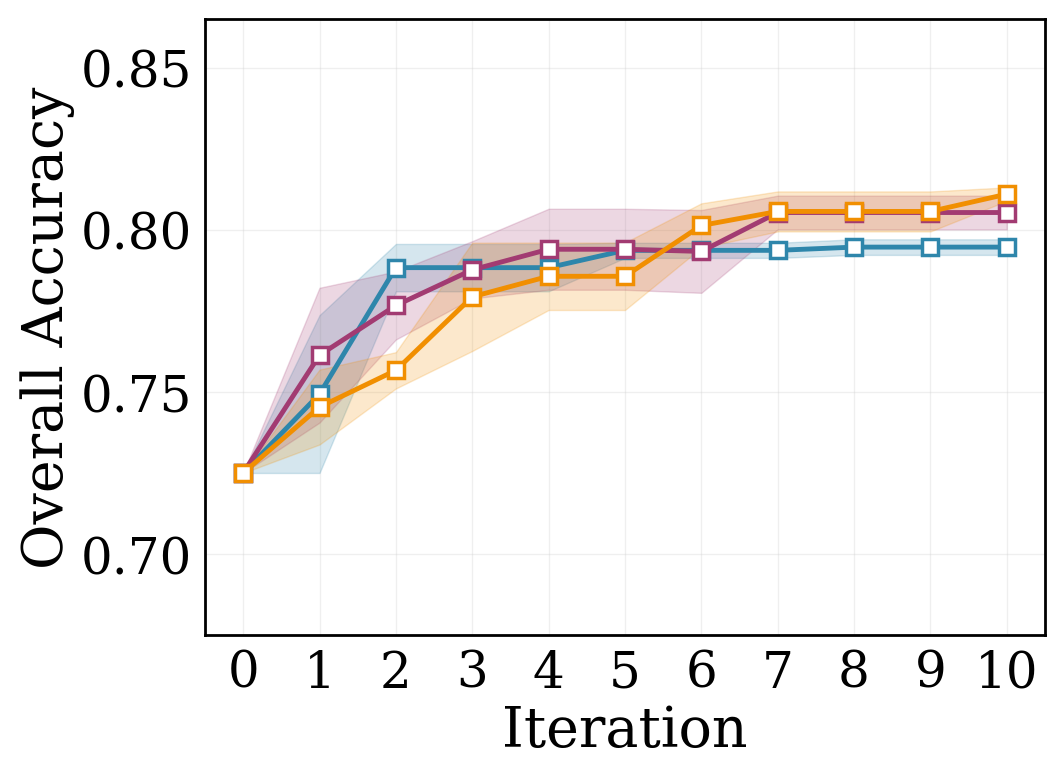

Generating figures for benchmark: animals


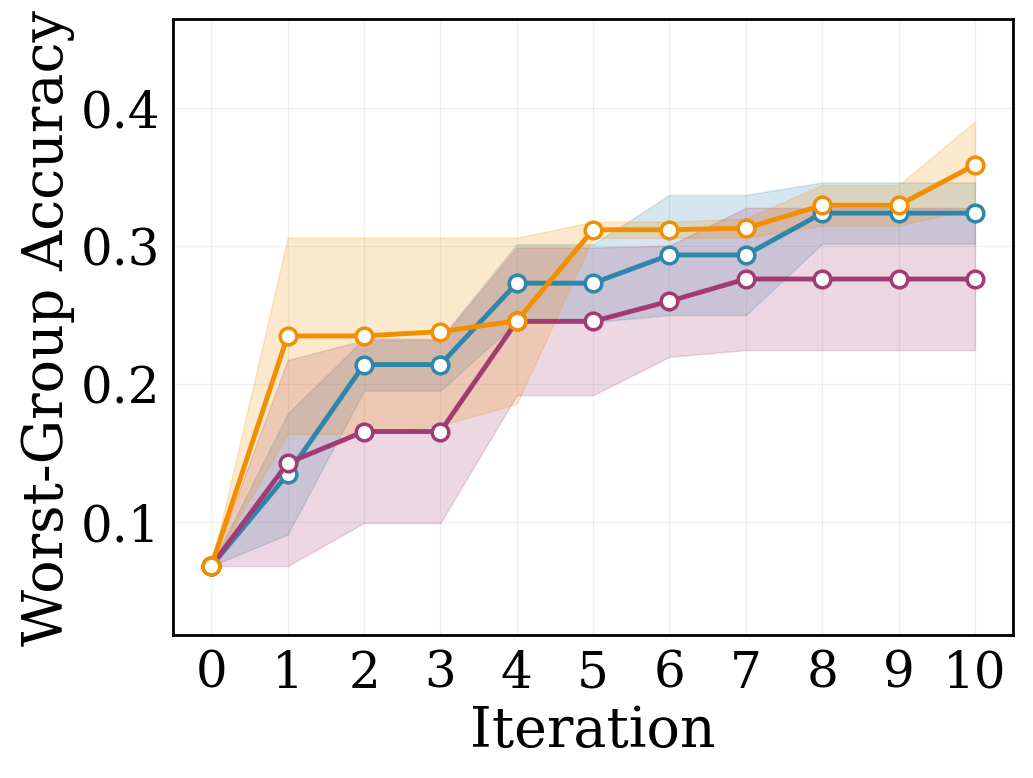

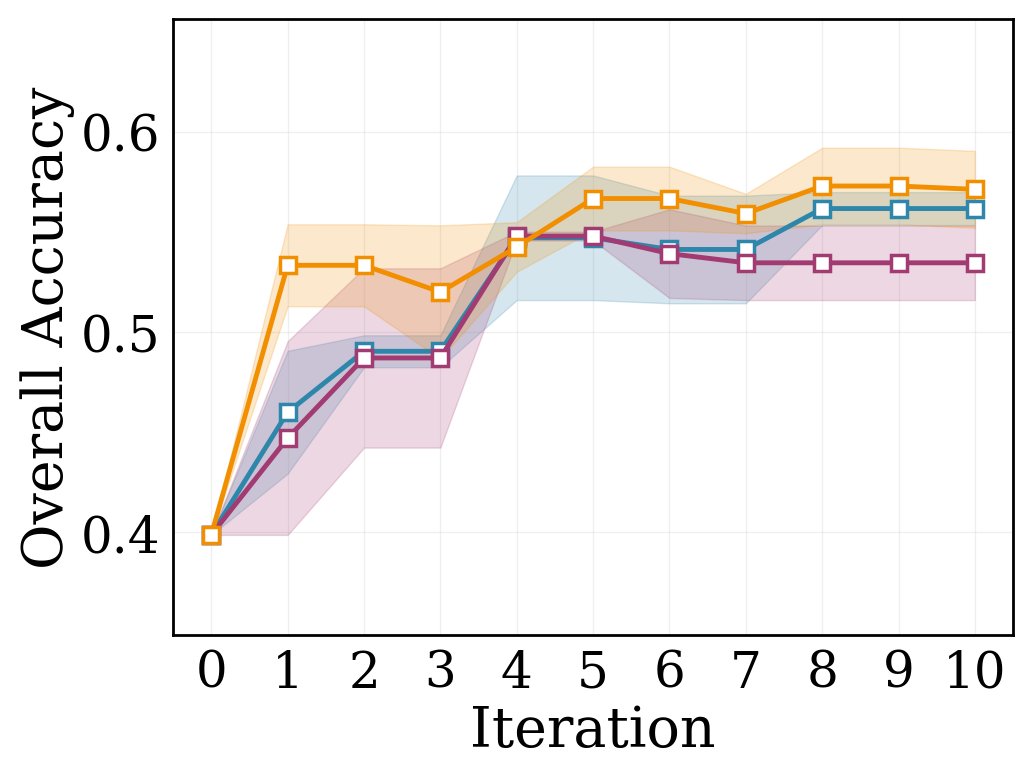

Generating figures for benchmark: ffhq


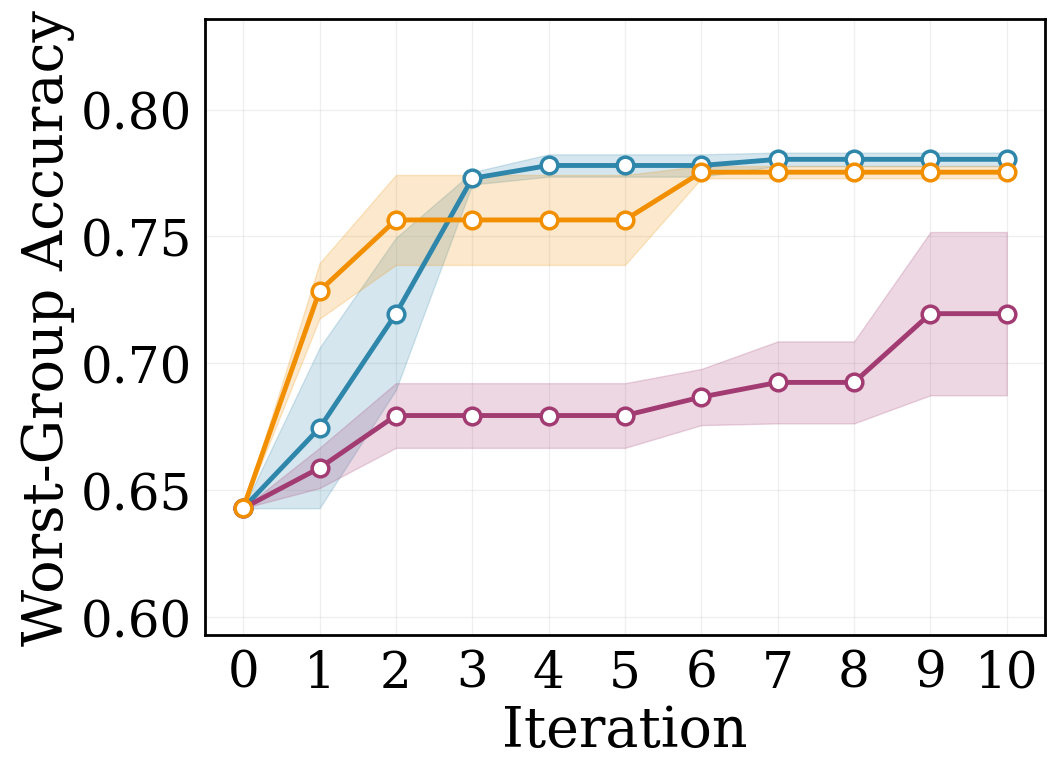

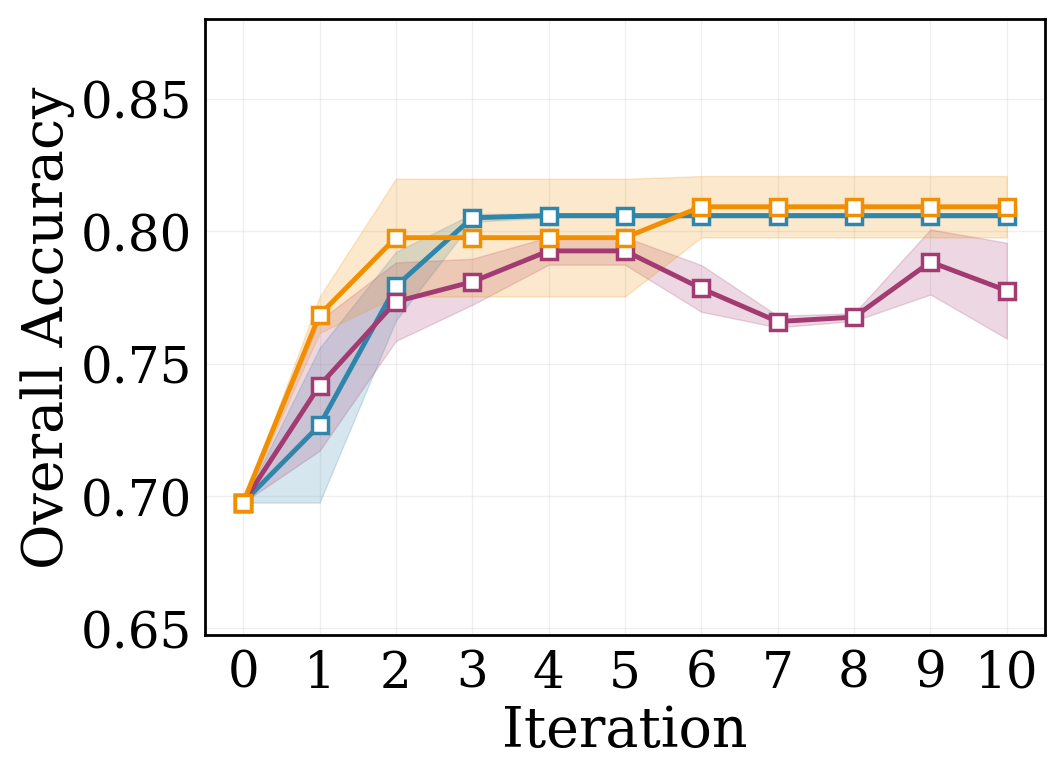

Generating figures for benchmark: fruits


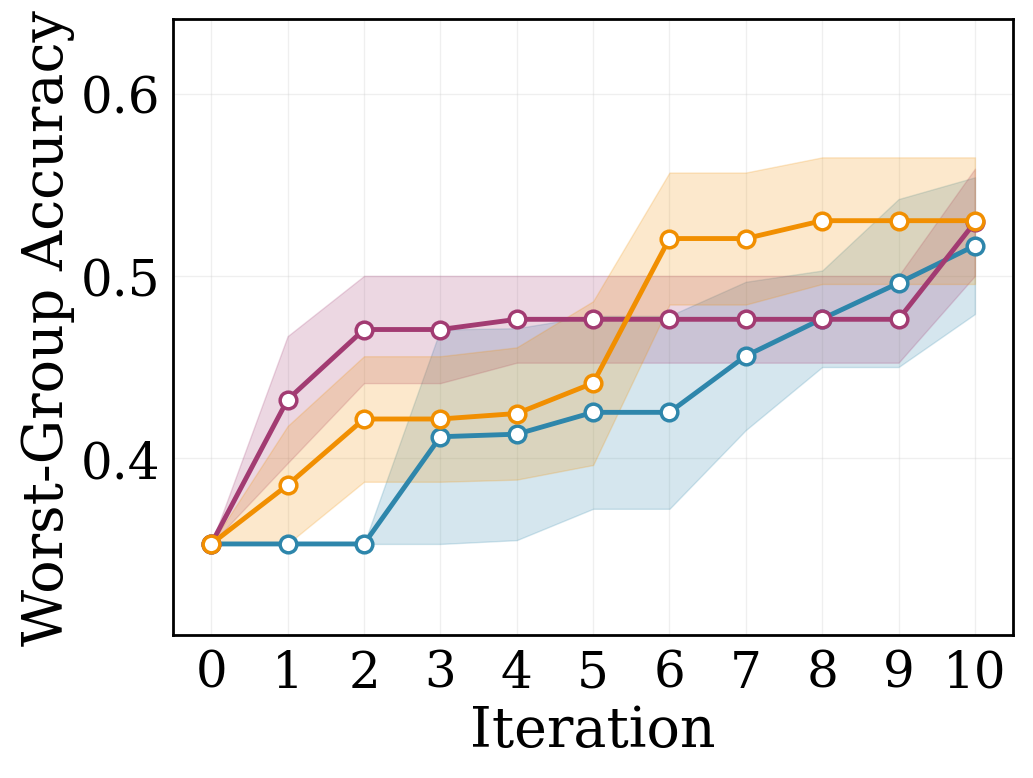

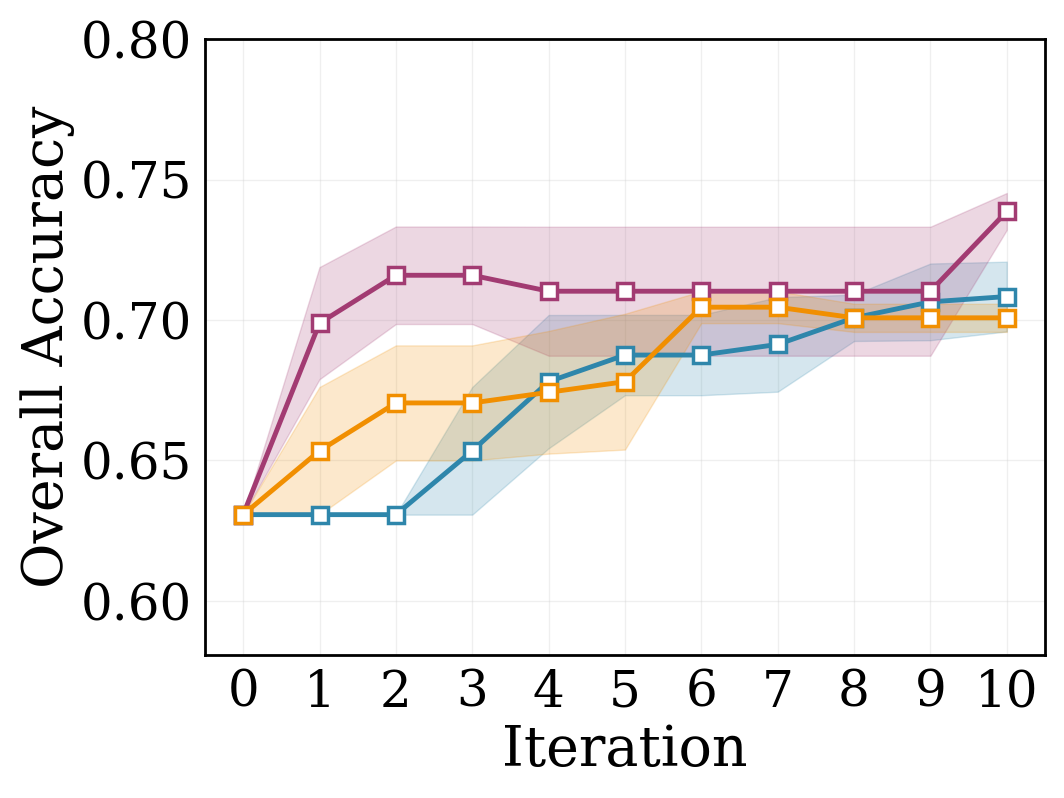


Generating combined comparison figures...


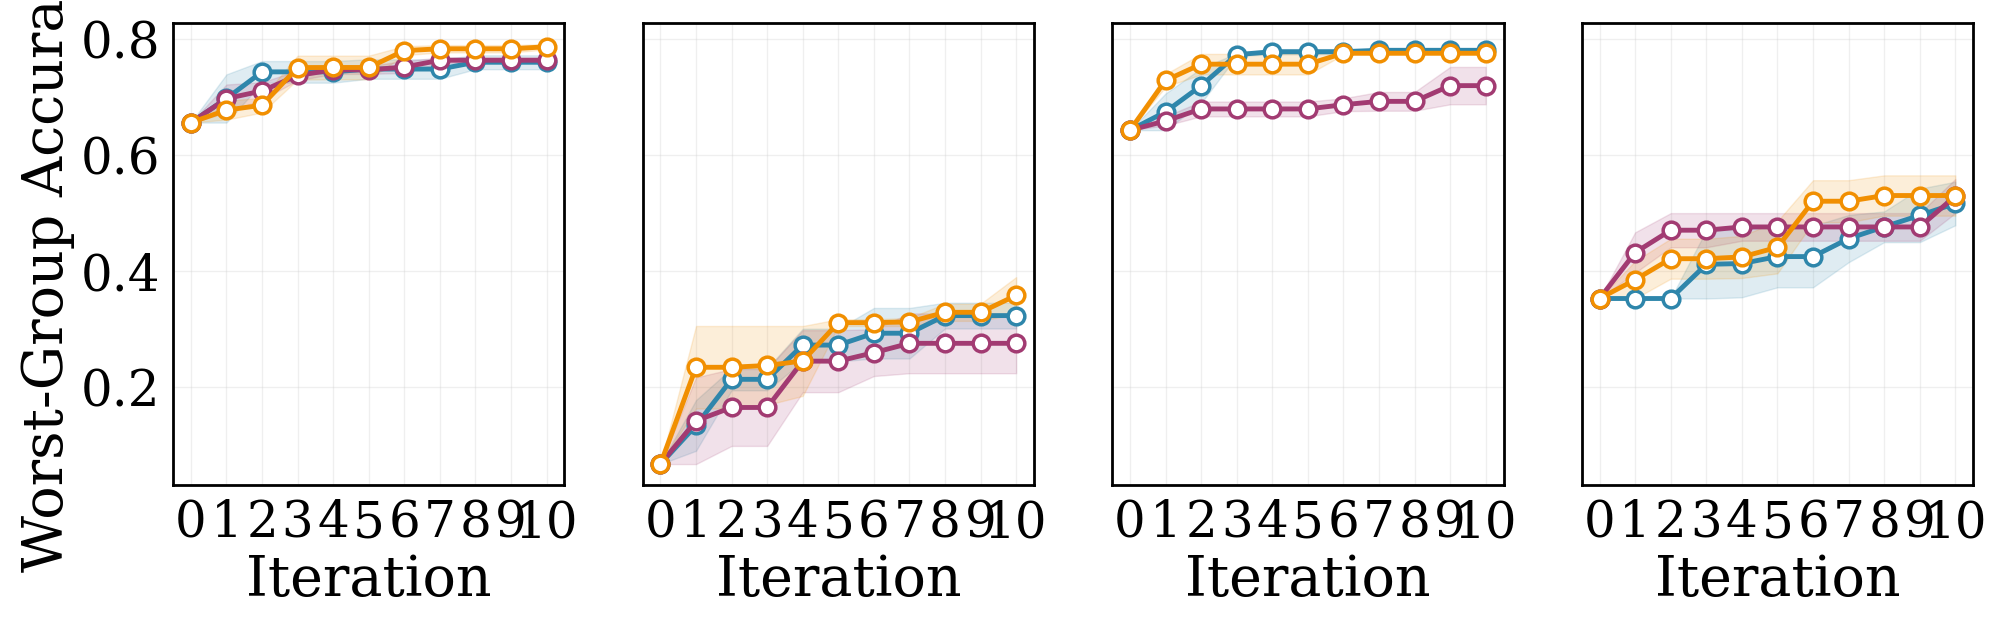

All figures saved to figures/
Generated files:
  - adience_overall_accuracy.png
  - adience_worst_group_accuracy.png
  - animals_overall_accuracy.png
  - animals_worst_group_accuracy.png
  - combined_worst_group_accuracy.png
  - ffhq_overall_accuracy.png
  - ffhq_worst_group_accuracy.png
  - fruits_overall_accuracy.png
  - fruits_worst_group_accuracy.png
  - legend.png


In [12]:
# Generate professional figures for each benchmark
if not df.empty and benchmark_dataframes:
    # Set professional styling with integrated config

    # Professional color palette
    colors = ['#2E86AB', '#A23B72', '#F18F01']  # Blue, Purple, Orange

    # Create a separate legend figure
    fig_legend, ax_legend = plt.subplots(figsize=(15, 2))
    ax_legend.axis('off')

    # Get all unique scenarios from the data
    all_scenarios = df['scenario'].unique()

    # Create legend handles
    legend_handles = []
    for i, scenario in enumerate(all_scenarios):
        handle = plt.Line2D([0], [0], color=colors[i % len(colors)], marker='o',
                           markersize=15, linewidth=3.5, label=scenario,
                           markerfacecolor='white', markeredgewidth=2,
                           markeredgecolor=colors[i % len(colors)])
        legend_handles.append(handle)

    # Create horizontal legend
    legend = ax_legend.legend(handles=legend_handles, loc='center', ncol=len(all_scenarios),
                             frameon=False, handlelength=3, handletextpad=1,
                             columnspacing=3, fontsize=40)

    plt.tight_layout()
    plt.savefig(fig_dir / 'legend.png', dpi=300, bbox_inches='tight', format='png')
    plt.show()

    # Generate figures for each benchmark individually (without legends)
    for benchmark_name, benchmark_df in benchmark_dataframes.items():
        if benchmark_df.empty:
            continue

        print(f"Generating figures for benchmark: {benchmark_name}")

        # 1. Worst-Group Accuracy Over Iterations
        fig, ax = plt.subplots(figsize=(12, 8))

        # Plot lines for each scenario
        scenarios_in_data = benchmark_df['scenario'].unique()
        for i, scenario in enumerate(scenarios_in_data):
            scenario_data = benchmark_df[benchmark_df['scenario'] == scenario]

            # Group by iteration and calculate mean and std
            grouped = scenario_data.groupby('iteration')['worst_group_accuracy'].agg(['mean', 'std', 'count']).reset_index()

            # Calculate standard error
            grouped['se'] = grouped['std'] / np.sqrt(grouped['count'])

            # Plot mean line
            ax.plot(grouped['iteration'], grouped['mean'],
                   color=colors[i % len(colors)], marker='o', markersize=12,
                   linewidth=3.5, markerfacecolor='white',
                   markeredgewidth=2.5, markeredgecolor=colors[i % len(colors)])

            # Add error bands if multiple runs exist
            if any(grouped['count'] > 1):
                ax.fill_between(grouped['iteration'],
                               grouped['mean'] - grouped['se'],
                               grouped['mean'] + grouped['se'],
                               alpha=0.2, color=colors[i % len(colors)])

        ax.set_xlabel('Iteration', fontsize=40)
        ax.set_ylabel('Worst-Group Accuracy', fontsize=40)
        ax.grid(True, alpha=0.3)
        ax.set_xticks(sorted(benchmark_df['iteration'].unique()))
        ax.tick_params(axis='both', which='major', labelsize=36)

        # Set y-axis to start from a reasonable minimum
        y_min = max(0, benchmark_df['worst_group_accuracy'].min() - 0.05)
        y_max = min(1, benchmark_df['worst_group_accuracy'].max() + 0.05)
        ax.set_ylim(y_min, y_max)

        # Adjust layout to prevent y-axis label from being cut off
        plt.subplots_adjust(left=0.2)  # Increase left margin
        plt.savefig(fig_dir / f'{benchmark_name}_worst_group_accuracy.png',
                   dpi=300, bbox_inches='tight', format='png')
        plt.show()

        # 2. Overall Accuracy Over Iterations
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, scenario in enumerate(scenarios_in_data):
            scenario_data = benchmark_df[benchmark_df['scenario'] == scenario]

            # Group by iteration and calculate statistics
            grouped = scenario_data.groupby('iteration')['overall_accuracy'].agg(['mean', 'std', 'count']).reset_index()
            grouped['se'] = grouped['std'] / np.sqrt(grouped['count'])

            # Plot mean line
            ax.plot(grouped['iteration'], grouped['mean'],
                   color=colors[i % len(colors)], marker='s', markersize=12,
                   linewidth=3.5, markerfacecolor='white',
                   markeredgewidth=2.5, markeredgecolor=colors[i % len(colors)])

            # Add error bands if multiple runs exist
            if any(grouped['count'] > 1):
                ax.fill_between(grouped['iteration'],
                               grouped['mean'] - grouped['se'],
                               grouped['mean'] + grouped['se'],
                               alpha=0.2, color=colors[i % len(colors)])

        ax.set_xlabel('Iteration', fontsize=40)
        ax.set_ylabel('Overall Accuracy', fontsize=40)
        ax.grid(True, alpha=0.3)
        ax.set_xticks(sorted(benchmark_df['iteration'].unique()))
        ax.tick_params(axis='both', which='major', labelsize=36)

        # Set y-axis to start from a reasonable minimum
        y_min = max(0, benchmark_df['overall_accuracy'].min() - 0.05)
        y_max = min(1, benchmark_df['overall_accuracy'].max() + 0.05)
        ax.set_ylim(y_min, y_max)

        # Adjust layout to prevent y-axis label from being cut off
        plt.subplots_adjust(left=0.2)  # Increase left margin
        plt.savefig(fig_dir / f'{benchmark_name}_overall_accuracy.png',
                   dpi=300, bbox_inches='tight', format='png')
        plt.show()

    # Generate combined comparison figures across all benchmarks (without legends)
    print("\nGenerating combined comparison figures...")

    # Combined Worst-Group Accuracy
    fig, axes = plt.subplots(1, len(benchmark_dataframes), 
                           figsize=(6*len(benchmark_dataframes), 6), 
                           sharey=True)
    if len(benchmark_dataframes) == 1:
        axes = [axes]

    for idx, (benchmark_name, benchmark_df) in enumerate(benchmark_dataframes.items()):
        if benchmark_df.empty:
            continue

        ax = axes[idx]
        scenarios_in_data = benchmark_df['scenario'].unique()

        for i, scenario in enumerate(scenarios_in_data):
            scenario_data = benchmark_df[benchmark_df['scenario'] == scenario]
            grouped = scenario_data.groupby('iteration')['worst_group_accuracy'].agg(['mean', 'std', 'count']).reset_index()
            grouped['se'] = grouped['std'] / np.sqrt(grouped['count'])

            ax.plot(grouped['iteration'], grouped['mean'],
                   color=colors[i % len(colors)], marker='o', markersize=12,
                   linewidth=3.5, markerfacecolor='white', markeredgewidth=2.5,
                   markeredgecolor=colors[i % len(colors)])

            if any(grouped['count'] > 1):
                ax.fill_between(grouped['iteration'],
                               grouped['mean'] - grouped['se'],
                               grouped['mean'] + grouped['se'],
                               alpha=0.15, color=colors[i % len(colors)])

        ax.set_xlabel('Iteration', fontsize=40)
        if idx == 0:
            ax.set_ylabel('Worst-Group Accuracy', fontsize=40)
        ax.grid(True, alpha=0.3)
        ax.set_xticks(sorted(benchmark_df['iteration'].unique()))
        ax.tick_params(axis='both', which='major', labelsize=36)

    # Adjust layout to prevent y-axis label from being cut off
    plt.subplots_adjust(left=0.15)  # Increase left margin
    plt.savefig(fig_dir / 'combined_worst_group_accuracy.png',
               dpi=300, bbox_inches='tight', format='png')
    plt.show()

    print(f"All figures saved to {fig_dir}/")
    print("Generated files:")
    for file in sorted(fig_dir.glob("*.png")):
        print(f"  - {file.name}")
else:
    print("No data available for plotting.")

## Overall Accuracy Over Iterations

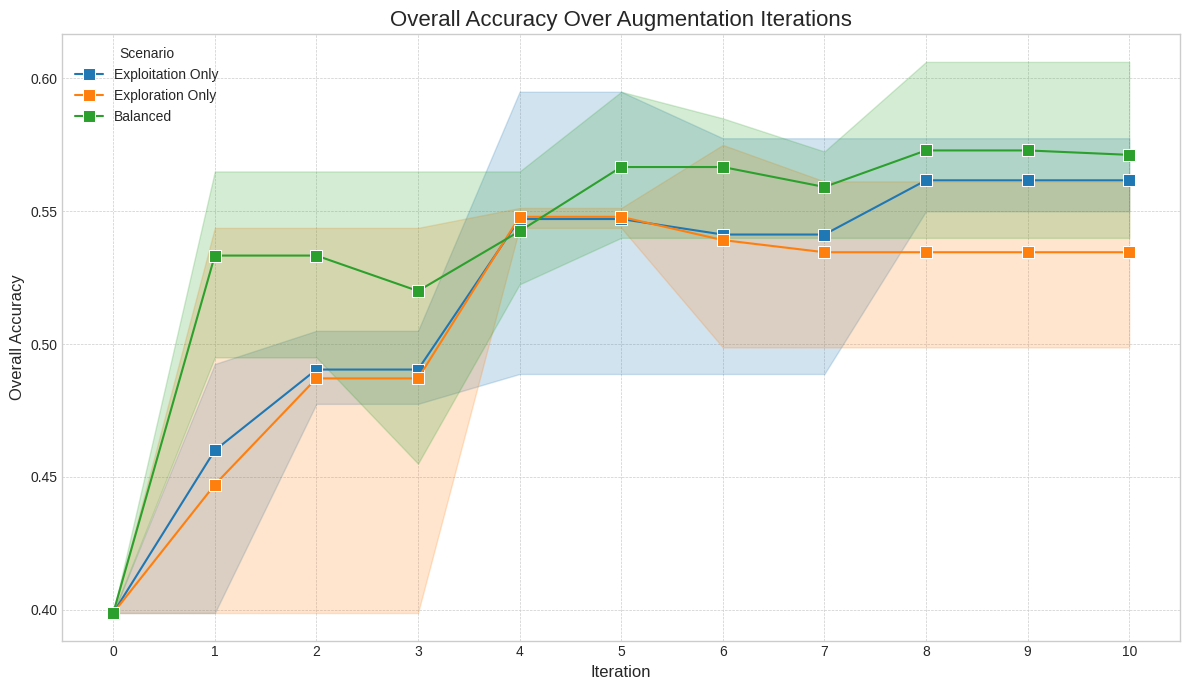

In [4]:
if not df.empty:
    plt.figure(figsize=(12, 7))

    sns.lineplot(data=df, x="iteration", y="overall_accuracy", hue="scenario", marker="s", markersize=8)

    plt.title("Overall Accuracy Over Augmentation Iterations", fontsize=16)
    plt.xlabel("Iteration", fontsize=12)
    plt.ylabel("Overall Accuracy", fontsize=12)
    plt.legend(title="Scenario", fontsize=10)
    if not df.empty:
        plt.xticks(sorted(df['iteration'].unique()))
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

## Price of Fairness Summary

Price of Fairness Summary (Individual Runs):


,Scenario,Run,Initial Accuracy,Final Accuracy,Price of Fairness
0,Exploitation Only,2,0.630682,0.693182,-0.062500
1,Exploitation Only,3,0.630682,0.698864,-0.068182
2,Exploitation Only,1,0.630682,0.732955,-0.102273
3,Exploration Only,1,0.630682,0.750000,-0.119318
4,Exploration Only,3,0.630682,0.727273,-0.096591
5,Exploration Only,2,0.630682,0.738636,-0.107955
6,Balanced,2,0.630682,0.693182,-0.062500
7,Balanced,3,0.630682,0.698864,-0.068182
8,Balanced,1,0.630682,0.710227,-0.079545



Price of Fairness Summary (Aggregated):


,Scenario,Initial Accuracy,Final Accuracy,Price of Fairness
0,Balanced,0.630682,0.700758,-0.070076
1,Exploitation Only,0.630682,0.708333,-0.077652
2,Exploration Only,0.630682,0.738636,-0.107955


/tmp/ipykernel_2108520/3935719949.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Price of Fairness", y="Scenario", data=pof_df, palette="viridis")


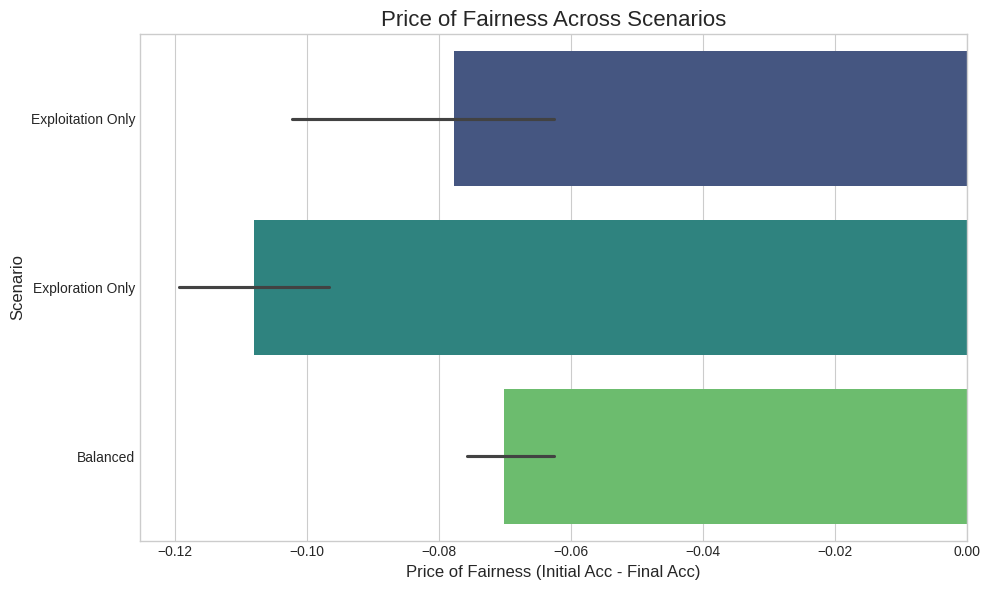

In [ ]:
if all_results:
    pof_data = []
    for data in all_results:
        scenario_name = data['scenario_name']
        display_name = [k for k, v in scenarios.items() if v == scenario_name][0]
        pof_data.append({
            "Scenario": display_name,
            "Run": data['run_number'],
            "Initial Accuracy": data['initial_accuracy'],
            "Final Accuracy": data['final_accuracy'],
            "Price of Fairness": data['price_of_fairness']
        })

    pof_df = pd.DataFrame(pof_data)
    print("Price of Fairness Summary (Individual Runs):")
    display(pof_df)

    # Aggregate results
    pof_summary_df = pof_df.groupby('Scenario').mean().reset_index().drop(columns=['Run'])
    print("\nPrice of Fairness Summary (Aggregated):")
    display(pof_summary_df)

    # Plotting Price of Fairness
    plt.figure(figsize=(12, 8))
    sns.barplot(x="Price of Fairness", y="Scenario", data=pof_df, palette="viridis", errorbar="se", capsize=0.1)
    plt.xlabel("Price of Fairness (Initial Acc - Final Acc)", fontsize=40)
    plt.ylabel("Scenario", fontsize=40)
    plt.tick_params(axis='both', which='major', labelsize=36)
    
    # Add gridlines
    plt.grid(True, axis='x', alpha=0.3)
    
    plt.tight_layout()
    
    # Save the plot
    plt.savefig(fig_dir / "price_of_fairness.png", dpi=300, bbox_inches="tight")
    plt.show()